# 폴더에 있는 이미지 모두 가져오기
- https://www.tensorflow.org/tutorials/load_data/images 소스 참고
- f:\datasets\flower_photos.tgz
> - daisy(633장)
> - dandelion(898장)
> - roses(641장)
> - sunflowers(699장)
> - tulips(799장)
- d:\개발\datasets\flower_photos 에 압축을 품

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [2]:
tf.__version__

'2.6.0'

In [3]:
data_dir = keras.utils.get_file(origin='https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
                               fname='flower_photos', untar=True)
## C:\Users\user\.keras\datasets\flower_photos 폴더에 저장됨 (리턴값은 경로)

In [5]:
import os
files = os.listdir('C:/Users/kwjeon31/.keras/datasets/flower_photos/daisy')
files

['100080576_f52e8ee070_n.jpg',
 '10140303196_b88d3d6cec.jpg',
 '10172379554_b296050f82_n.jpg',
 '10172567486_2748826a8b.jpg',
 '10172636503_21bededa75_n.jpg',
 '102841525_bd6628ae3c.jpg',
 '1031799732_e7f4008c03.jpg',
 '10391248763_1d16681106_n.jpg',
 '10437754174_22ec990b77_m.jpg',
 '10437770546_8bb6f7bdd3_m.jpg',
 '10437929963_bc13eebe0c.jpg',
 '10466290366_cc72e33532.jpg',
 '10466558316_a7198b87e2.jpg',
 '10555749515_13a12a026e.jpg',
 '10555815624_dc211569b0.jpg',
 '10555826524_423eb8bf71_n.jpg',
 '10559679065_50d2b16f6d.jpg',
 '105806915_a9c13e2106_n.jpg',
 '10712722853_5632165b04.jpg',
 '107592979_aaa9cdfe78_m.jpg',
 '10770585085_4742b9dac3_n.jpg',
 '10841136265_af473efc60.jpg',
 '10993710036_2033222c91.jpg',
 '10993818044_4c19b86c82.jpg',
 '10994032453_ac7f8d9e2e.jpg',
 '11023214096_b5b39fab08.jpg',
 '11023272144_fce94401f2_m.jpg',
 '11023277956_8980d53169_m.jpg',
 '11124324295_503f3a0804.jpg',
 '1140299375_3aa7024466.jpg',
 '11439894966_dca877f0cd.jpg',
 '1150395827_6f94a5c6e4_n

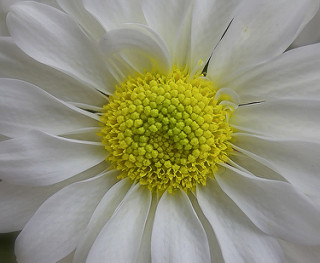

In [9]:
import PIL
PIL.Image.open('C:/Users/kwjeon31/.keras/datasets/flower_photos/daisy/' + files[0])

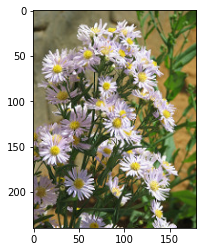

In [10]:
image = plt.imread('C:/Users/kwjeon31/.keras/datasets/flower_photos/daisy/' + files[-1])
plt.imshow(image)

### image_dataset_from_directory

In [12]:
train_ds = keras.preprocessing.image_dataset_from_directory(
                'C:/Users/kwjeon31/.keras/datasets/flower_photos/',
                validation_split=0.2,
                subset='training', # 학습/검증 중 학습 데이터
                seed=123,
                image_size=(180,180),
                batch_size=32)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [13]:
train_ds

<BatchDataset shapes: ((None, 180, 180, 3), (None,)), types: (tf.float32, tf.int32)>

In [14]:
type(train_ds)

tensorflow.python.data.ops.dataset_ops.BatchDataset

In [16]:
val_ds = keras.preprocessing.image_dataset_from_directory(
                'C:/Users/kwjeon31/.keras/datasets/flower_photos/',
                validation_split=0.2,
                subset='validation', # 학습/검증 중 검증 데이터
                seed=123,
                image_size=(180,180),
                batch_size=32)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [17]:
train_ds.class_names

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

<class 'tensorflow.python.framework.ops.EagerTensor'> <class 'tensorflow.python.framework.ops.EagerTensor'>
(32, 180, 180, 3) (32,)


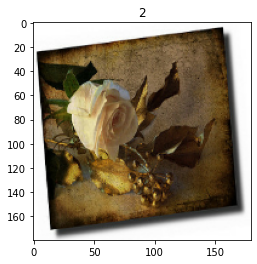

In [18]:
for images, labels in train_ds.take(1):
    print(type(images), type(labels))
    print(images.shape, labels.shape)
    plt.imshow(images[0].numpy().astype('uint8')) # 픽셀값이 0.0 ~ 255.0
    plt.title(labels[0].numpy())

(32, 180, 180, 3) (32,)


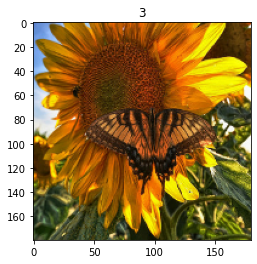

In [19]:
for images, labels in train_ds:
    print(images.shape, labels.shape)
    plt.imshow(images[0].numpy().astype('uint8'))
    plt.title(labels[0].numpy())
    break

### Resizing, Rescaling 레이어

In [20]:
resizing_layer = keras.layers.experimental.preprocessing.Resizing(10,10)

In [23]:
image = plt.imread('C:/Users/kwjeon31/.keras/datasets/flower_photos/daisy/' + files[-1])
image2 = resizing_layer(image).numpy().astype('uint8')

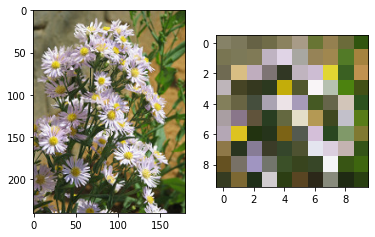

In [24]:
plt.subplot(1,2,1)
plt.imshow(image)
plt.subplot(1,2,2)
plt.imshow(image2)

In [25]:
rescaling_layer = keras.layers.experimental.preprocessing.Rescaling(1/255)

In [26]:
image = plt.imread('C:/Users/kwjeon31/.keras/datasets/flower_photos/daisy/' + files[-1])
image2 = rescaling_layer(image).numpy()
image2.min(), image2.max()

(0.0, 1.0)

### 이미지 버퍼링
- cache() : 첫번째 배치에서 읽어온 이미지를 메모리나 하드에 버퍼링함
- prefetch() : 다음 이미지를 미리 불러올 메모리 공간 설정
> 튜토리얼 설명 참고

In [27]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### 훈련

In [28]:
model = keras.models.Sequential()
model.add(keras.layers.experimental.preprocessing.Rescaling(1/255, input_shape=(180,180,3)))
model.add(keras.layers.Conv2D(32,3, activation='relu'))
model.add(keras.layers.MaxPooling2D())
model.add(keras.layers.Conv2D(32,3, activation='relu'))
model.add(keras.layers.MaxPooling2D())
model.add(keras.layers.Conv2D(32,3, activation='relu'))
model.add(keras.layers.MaxPooling2D())
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(5))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 178, 178, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 89, 89, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 87, 87, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 43, 43, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 41, 41, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 20, 20, 32)        0

In [29]:
model.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             optimizer='adam', metrics=['acc'])
## sparse : 목표값이 0,1,2,3,4 로 원핫인코딩 형태가 아니기 때문임
## from_logits=True : 최종 출력값에 softmax 를 적용하지 않았기 때문임

In [ ]:
model.fit(train_ds, validation_data=val_ds, epochs=40)

Epoch 1/40
92/92 [==============================] - 16s 89ms/step - loss: 1.2350 - acc: 0.4741 - val_loss: 1.0777 - val_acc: 0.5613
Epoch 2/40
92/92 [==============================] - 4s 43ms/step - loss: 0.9617 - acc: 0.6192 - val_loss: 1.0048 - val_acc: 0.5708
Epoch 3/40
92/92 [==============================] - 4s 43ms/step - loss: 0.8178 - acc: 0.6768 - val_loss: 0.9148 - val_acc: 0.6294
Epoch 4/40
92/92 [==============================] - 4s 43ms/step - loss: 0.6495 - acc: 0.7537 - val_loss: 1.0183 - val_acc: 0.6335
Epoch 5/40
92/92 [==============================] - 4s 43ms/step - loss: 0.4490 - acc: 0.8409 - val_loss: 1.0198 - val_acc: 0.6512
Epoch 6/40
92/92 [==============================] - 4s 44ms/step - loss: 0.3257 - acc: 0.8896 - val_loss: 1.1269 - val_acc: 0.6635
Epoch 7/40
92/92 [==============================] - 4s 43ms/step - loss: 0.3057 - acc: 0.9009 - val_loss: 1.4035 - val_acc: 0.6458
Epoch 8/40
92/92 [==============================] - 4s 43ms/step - loss: 0.2686 - 

In [32]:
h = model.history.history

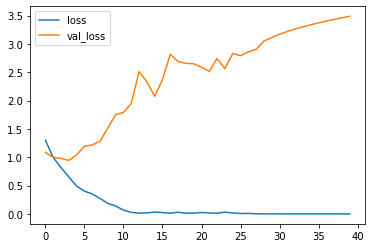

In [33]:
plt.plot(h['loss'])
plt.plot(h['val_loss'])
plt.legend(['loss', 'val_loss'])

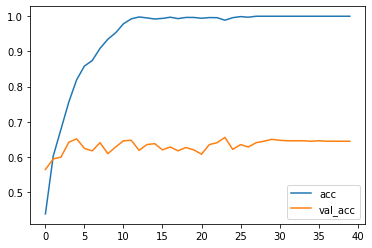

In [34]:
plt.plot(h['acc'])
plt.plot(h['val_acc'])
plt.legend(['acc', 'val_acc'])